# Salary Expectation Based on Experience

### Import library and datasets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('Salary_Data.csv')

In [5]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [7]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [8]:
# Check dimension dataset
data.shape

(30, 2)

In [9]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Missing values detection and cleaning

missing values : Null, Blank, NaN

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


Check null values

In [11]:
data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [12]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Visualization data

Text(0, 0.5, 'Years of Experience')

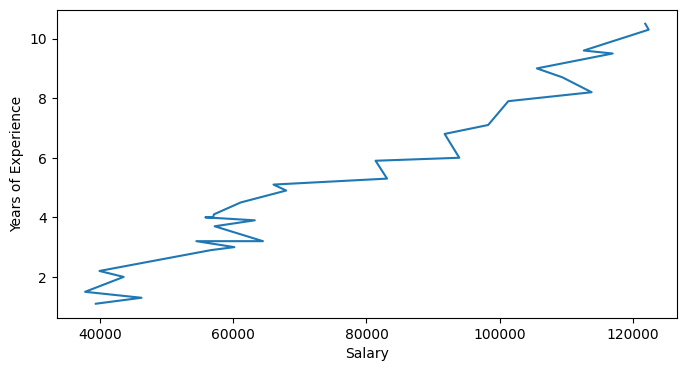

In [13]:
plt.figure(figsize=(8,4))
plt.plot(data['Salary'],data['YearsExperience'])

plt.xlabel('Salary')
plt.ylabel('Years of Experience')

### Correlation Plot 

<Axes: >

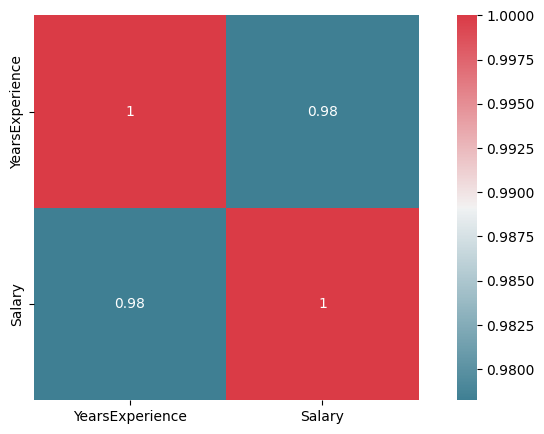

In [14]:
f, ax = plt.subplots(figsize=(10,5))
corr = data.corr('pearson')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_),cmap=sns.diverging_palette(220,10, as_cmap=True), square=True, ax=ax,annot=True)

### Split dataset for training and testing

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Create variable x,y and remove salary column for prediction
x = data.drop('Salary',axis=1)
y = data['Salary']

In [17]:
print(x.head()) # YearExperience column
print(y.head()) # Salary column

   YearsExperience
0              1.1
1              1.3
2              1.5
3              2.0
4              2.2
0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64


In [18]:
# Create test and train part

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

### Create model regression and fit it

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
L = LinearRegression()

In [21]:
# fit model for training

L.fit(x_train,y_train)

LinearRegression()

In [22]:
# model prediction for testing

y_pred = L.predict(x_test)

In [23]:
# predicted values
print('Predicted values :',L.score(x_test,y_test))

Predicted values : 0.9024461774180497


prediction : 90% accuracy 

### Predicted Salary based on experience

***Actual salary vs Predicted salary***

In [24]:
print('Actual salary :',y)

Actual salary : 0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64


In [25]:
print('Predicted salary :',y_pred)

Predicted salary : [115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]
